In [32]:
import pandas as pd

#data_test = pd.read_csv("data/test.csv")
data_test = pd.read_csv("https://raw.githubusercontent.com/relfarizi/Tubes_Chemo_Informatics/master/Data/test.csv")
data_test_fitur = data_test.iloc[:,:34]
data_test_label = data_test.iloc[:,34]
data_test.shape

(697, 35)

# New Section

In [33]:
#data_train = pd.read_csv("data/train.csv")
data_train = pd.read_csv("https://raw.githubusercontent.com/relfarizi/Tubes_Chemo_Informatics/master/Data/train.csv")
data_train_fitur = data_train.iloc[:,:34]
data_train_label = data_train.iloc[:,34]
feature = data_train_fitur.columns
print(feature)
data_train.shape
#data_train_label

Index(['ALogP', 'ATS0m', 'AATS6m', 'AATS8v', 'AATS8e', 'AATS1i', 'AATS3i',
       'AATS2s', 'AATS7s', 'AATS8s', 'ATSC1m', 'ATSC1i', 'ATSC3i', 'ATSC8i',
       'AATSC0v', 'C1SP2', 'CrippenLogP', 'SaasC', 'SssNH', 'SdO', 'minHBa',
       'maxaaN', 'MAXDN', 'MAXDP', 'ETA_dBeta', 'nHBDon', 'MIC2', 'ZMIC5',
       'MDEC-33', 'MLFER_E', 'n6Ring', 'nHeteroRing', 'n6HeteroRing', 'SRW5'],
      dtype='object')


(1626, 35)

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split


#X_train, X_test, y_train, y_test = train_test_split(data_train_fitur,data_train_label,test_size=0.3)

X_train = data_train_fitur
y_train = data_train_label
X_test = data_test_fitur
y_test = data_test_label
print((y_test))

0      0
1      0
2      1
3      1
4      0
      ..
692    1
693    0
694    1
695    1
696    1
Name: Label, Length: 697, dtype: int64


In [7]:
clf =(RandomForestClassifier(n_estimators = 100, verbose = 1))
clf.fit(X_train, y_train)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=1, warm_start=False)

In [8]:
for x in zip(feature, clf.feature_importances_):
    print(x)

('ALogP', 0.006660876269993916)
('ATS0m', 0.08519258069683594)
('AATS6m', 0.030902658868332322)
('AATS8v', 0.055825801727051025)
('AATS8e', 0.024074195626533502)
('AATS1i', 0.019770716449968986)
('AATS3i', 0.009318867901698707)
('AATS2s', 0.005889391203247362)
('AATS7s', 0.009124727385955362)
('AATS8s', 0.018816935791990227)
('ATSC1m', 0.009895789148288344)
('ATSC1i', 0.0061935336106611364)
('ATSC3i', 0.005406690628382345)
('ATSC8i', 0.00460544206908981)
('AATSC0v', 0.009810836885633127)
('C1SP2', 0.03731276918375486)
('CrippenLogP', 0.008215633167108027)
('SaasC', 0.009155407965669705)
('SssNH', 0.09959877165796843)
('SdO', 0.011743903740134842)
('minHBa', 0.014216918932194789)
('maxaaN', 0.07851726245416094)
('MAXDN', 0.008782253462699617)
('MAXDP', 0.008224327927578568)
('ETA_dBeta', 0.007940806842191197)
('nHBDon', 0.02734992731150662)
('MIC2', 0.10676595324773508)
('ZMIC5', 0.013899805869306227)
('MDEC-33', 0.03682197469657188)
('MLFER_E', 0.17754940594402172)
('n6Ring', 0.0055748

In [11]:
sfm = SelectFromModel(clf, threshold=0.015)
# Train the selector
sfm.fit(X_train, y_train)
len(sfm.get_support())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


34

In [16]:
feature_selected = []
for feature_list_index in sfm.get_support(indices=True):
    #print(feature_list_index)
    #print(feature[feature_list_index])
    feature_selected.append(feature[feature_list_index])

data = data_train.loc[:,[x for x in feature_selected]]
correlation = data.corr()
correlation

,ATS0m,AATS6m,AATS8v,AATS8e,AATS1i,C1SP2,SssNH,maxaaN,nHBDon,MIC2,MDEC-33,MLFER_E,nHeteroRing,SRW5
ATS0m,1.000000,0.584871,0.451057,0.148712,0.022330,0.322347,0.399633,0.332049,0.289095,0.766824,0.268487,0.529192,0.222314,0.093243
AATS6m,0.584871,1.000000,0.478647,0.251580,0.026673,0.245401,0.244620,0.230400,0.239307,0.741972,0.278121,0.389039,0.128013,0.146949
AATS8v,0.451057,0.478647,1.000000,0.567165,0.019883,0.385699,0.418940,0.409659,0.284981,0.553648,0.309862,0.615735,0.308506,0.267195
AATS8e,0.148712,0.251580,0.567165,1.000000,0.027334,0.144266,0.170307,0.113744,0.182795,0.259343,0.215332,0.254222,0.124469,0.089241
AATS1i,0.022330,0.026673,0.019883,0.027334,1.000000,0.331792,0.393611,0.448530,0.444331,0.133874,-0.095368,0.225114,0.307547,0.153927
C1SP2,0.322347,0.245401,0.385699,0.144266,0.331792,1.000000,0.453720,0.609619,0.176645,0.428115,0.251635,0.585807,0.710634,0.430434
SssNH,0.399633,0.244620,0.418940,0.170307,0.393611,0.453720,1.000000,0.466506,0.630323,0.406729,0.185181,0.588320,0.379462,0.248232
maxaaN,0.332049,0.230400,0.409659,0.113744,0.448530,0.609619,0.466506,1.000000,0.258092,0.430950,0.148047,0.662881,0.549211,0.325147
nHBDon,0.289095,0.239307,0.284981,0.182795,0.444331,0.176645,0.630323,0.258092,1.000000,0.377189,0.305753,0.455228,0.134611,0.153396
MIC2,0.766824,0.741972,0.553648,0.259343,0.133874,0.428115,0.406729,0.430950,0.377189,1.000000,0.454457,0.638344,0.354737,0.262958


<function matplotlib.pyplot.show>

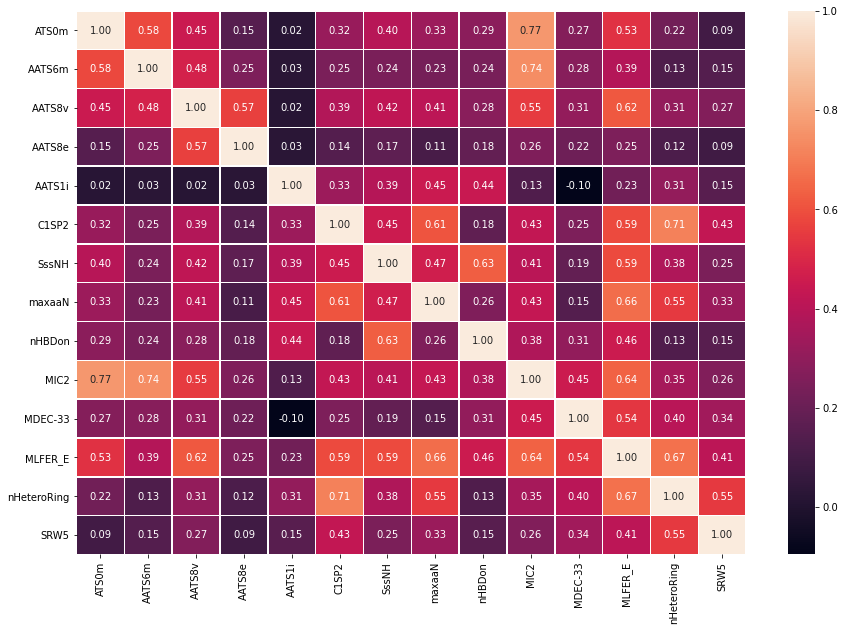

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(correlation, annot=True, linewidths=.5, fmt='.2f', ax=ax)
plt.show

In [0]:
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [25]:
clf_important = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [27]:
from sklearn.metrics import accuracy_score

y_pred = clf_important.predict(X_important_test)

accuracy_score(y_test, y_pred)

0.9727403156384505

In [28]:

y_important_pred = clf_important.predict(X_important_train)

accuracy_score(y_train, y_important_pred)

1.0

In [37]:
from xgboost import XGBClassifier

model_1 = XGBClassifier()

model_1.fit(X_important_train,y_train)

y_pred_train_model_1 = model_1.predict(X_important_train)

accuracy_score(y_pred_train_model_1,y_train)

0.9969249692496925

In [48]:
from sklearn.metrics import confusion_matrix

con_matrix = confusion_matrix(y_pred_train_model_1, y_train)

tp, fp, fn, tn = con_matrix.ravel()

print(con_matrix)
print(tp, fp, fn, tn)
precision = tp/(tp+fp)
print("precision = ", precision)

recall = tp/(tp+fn)
print("recall = ", recall)

f1 = (2*recall*precision)/(recall+precision)
print("f1 = ",f1)


[[815   1]
 [  4 806]]
815 1 4 806
precision =  0.9987745098039216
recall =  0.9951159951159951
f1 =  0.9969418960244649


In [31]:
y_pred_test_model_1 = model_1.predict(X_important_test)

accuracy_score(y_pred_test_model_1,y_test)

0.9727403156384505

In [47]:
con_matrix = confusion_matrix(y_pred_test_model_1, y_test)

tp, fp, fn, tn = con_matrix.ravel()

print(con_matrix)
print(tp, fp, fn, tn)
precision = tp/(tp+fp)
print("precision = ", precision)

recall = tp/(tp+fn)
print("recall = ", recall)

f1 = (2*recall*precision)/(recall+precision)
print("f1 = ",f1)


[[338  12]
 [  7 340]]
338 12 7 340
precision =  0.9657142857142857
recall =  0.9797101449275363
f1 =  0.9726618705035971
